<a href="https://colab.research.google.com/github/LeuroPrince/Literature-Reproduction-for-WenLab/blob/main/Reproduction_of_figure_6C_for_WenLab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
###figure6C
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
figure_6C_up_file_path = '/content/drive/My Drive/WenLab/Figure 6-source data for Figure 6C_Upper.xlsx'
figure_6C_bottom_file_path = '/content/drive/My Drive/WenLab/Figure 6-source data for Figure 6C_Bottom.xlsx'
df_6C_up = pd.read_excel(figure_6C_up_file_path, header = 2)
df_6C_bottom = pd.read_excel(figure_6C_bottom_file_path, header = 2)
df_6C_up.head()
# df_6C_bottom.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,worm name,reversal duration_yaml,turn
0,20170630w1,8.564,0.0
1,NaN,2.341,0.0
2,NaN,8.783,0.0
3,W3,7.166,0.5
4,NaN,3.836,0.0


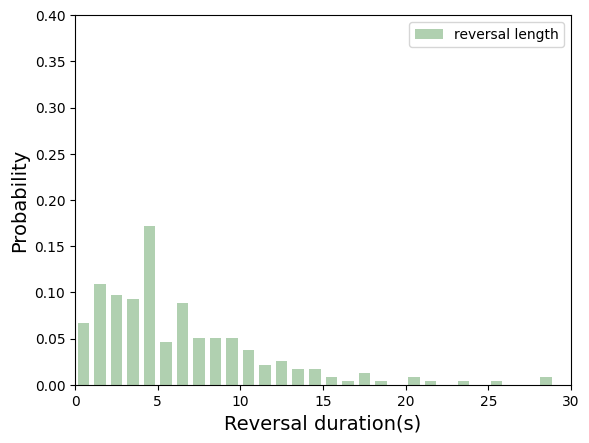

In [ ]:
reversal_length =df_6C_up['reversal duration_yaml'].fillna(0)

# reversal_length_real = reversal_length.fillna()
bins = np.arange(0, 30, 1)
myalpha = 0.7
rwidth = 0.7
plt.hist(reversal_length, bins=bins,
         label='reversal length',
         color='darkseagreen',
         alpha=myalpha,
         rwidth=rwidth,
         density=True)

plt.xlabel('Reversal duration(s)',fontsize = 14)
plt.ylabel('Probability',fontsize = 14)
plt.legend()
plt.ylim(0,0.4)
plt.xlim(0,30)
plt.show()

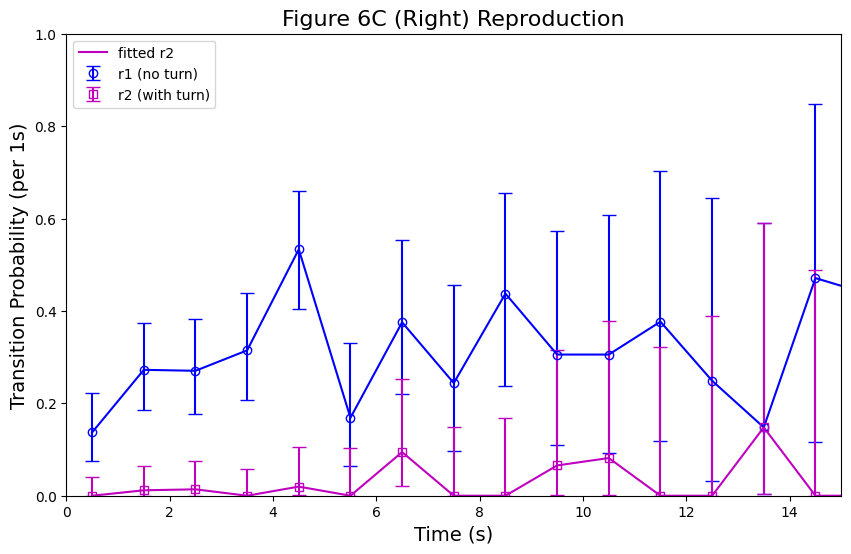

In [ ]:
# from os import pipe2
# from scipy.optimize import curve_fit
# from scipy.special import erfi  # 导入 erfi (虚误差函数)
# from statsmodels.stats.proportion import proportion_confint
# import warnings
# turn_reversal = df_6C_up[df_6C_up['turn'] == 1]['reversal duration_yaml']
# no_turn = df_6C_up[df_6C_up['turn'] == 0]['reversal duration_yaml']
# #定义bins
# bin_width = 1  #Δt = 0.5
# max_time = np.ceil(max(turn_reversal.max(),no_turn.max()))
# bins2 = np.arange(0, max_time+ bin_width, bin_width)

# bin_starts = bins2[:-1]
# bin_centers = bin_starts + (bin_width/2)

# #定义分子与分母的各项
#   #用histogram命令选取每个bin中完成的reversal的个数
# n_forward_i, _ = np.histogram(no_turn, bins=bins2)
# n_turn_i, _ = np.histogram(turn_reversal, bins=bins2)
#   #获得所有reversal的实验次数作为分母
# total_reversals = pd.concat([turn_reversal, no_turn])

#   #定义S_i，在这里我们要选取在bin=0.5s内的回退的次数，通过建立一个统计分布，我们就可以在任意选出的时间t，计算下一个t+bin的时刻发生转换的概率
# S_i_total = []
# for t_start in bin_starts:
#   hit = np.sum(total_reversals >= t_start) #用了一个广播比较来输出S_i(通过把all_reversals中的每一个项与每一次取出来的t_starts比较，输出bool值，让后将True = 1，False = 0，求和)
#   S_i_total.append(hit)

# S_i_total = np.array(S_i_total)

# ##计算转换率r1和r2，这里我们根据matlab代码中的处理方法，把被除数从公式中的Δt*Si换为Si，因为我们是从离散的数据中来拟合公式的，只能用这种经验式的处理方法
# p_r1 =np.divide(n_forward_i,S_i_total,
#               out = np.zeros_like(n_forward_i,dtype = float),
#               where=S_i_total!=0)
# p_r2 =np.divide(n_turn_i,S_i_total,
#               out = np.zeros_like(n_turn_i,dtype = float),
#               where=S_i_total!=0)
# err_forw_low_05, err_forw_high_05 = proportion_confint(n_forward_i, S_i_total, method='beta')
# err_turn_low_05, err_turn_high_05 = proportion_confint(n_turn_i, S_i_total, method='beta')
# def convert_p05_to_p1(p):
#   return 2*p - p**2
# y_plot_r1_data = convert_p05_to_p1(p_r1)
# y_plot_r2_data = convert_p05_to_p1(p_r2)
# ##转换误差棒
# ci_forw_low_1s = convert_p05_to_p1(err_forw_low_05)
# ci_forw_high_1s = convert_p05_to_p1(err_forw_high_05)
# ci_turn_low_1s = convert_p05_to_p1(err_turn_low_05)
# ci_turn_high_1s = convert_p05_to_p1(err_turn_high_05)
# y_err_r1_low = np.abs(y_plot_r1_data - ci_forw_low_1s)
# y_err_r1_high = np.abs(ci_forw_high_1s - y_plot_r1_data)
# y_err_r2_low =np.abs(y_plot_r2_data - ci_turn_low_1s)
# y_err_r2_high = np.abs(ci_turn_high_1s - y_plot_r2_data)
# ##转换拟合曲线
# plt.figure(figsize=(10, 6))

# # 绘制 r1 (no turn)
# plt.errorbar(bin_centers, y_plot_r1_data, yerr=[y_err_r1_low, y_err_r1_high],
#              fmt='bo', label='r1 (no turn)',
#              markerfacecolor='none', capsize=5)

# # 绘制 r2 (with turn)
# plt.errorbar(bin_centers, y_plot_r2_data, yerr=[y_err_r2_low, y_err_r2_high],
#              fmt='ms', label='r2 (with turn)',
#              markerfacecolor='none', capsize=5)

# # 绘制拟合曲线
# plt.plot(bin_centers, y_plot_r1_data, 'b-', label='_nolegend_') # 蓝色实线
# plt.plot(bin_centers, y_plot_r2_data, 'm-', label='fitted r2') # 粉色实线

# # 美化图表
# plt.xlabel('Reversal Duration (s)', fontsize=14)
# plt.ylabel('Transition Probability (1/s)', fontsize=14)
# plt.title('Figure 6C upper (Right) Reproduction', fontsize=16)
# plt.legend(loc='upper left')
# plt.ylim(0, 1.0)
# plt.xlim(0, 15)
# plt.grid(False) # 关闭网格

# plt.show()

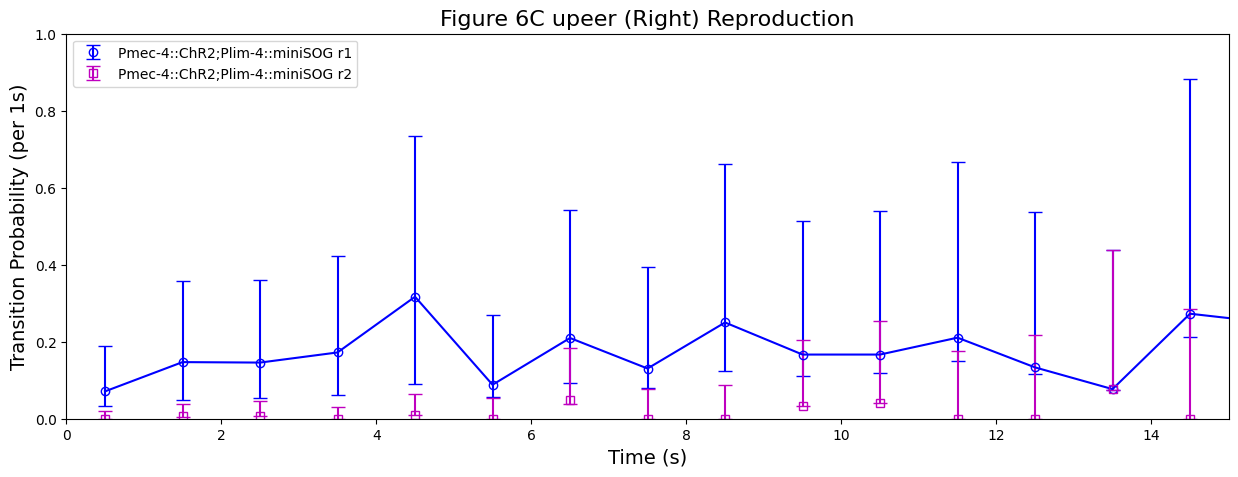

In [ ]:
from os import pipe2
from scipy.optimize import curve_fit
from scipy.special import erfi  # 导入 erfi (虚误差函数)
from statsmodels.stats.proportion import proportion_confint
import warnings
turn_reversal = df_6C_up[df_6C_up['turn'] ==1]['reversal duration_yaml']
no_turn = df_6C_up[df_6C_up['turn'] == 0]['reversal duration_yaml']
#定义bins
bin_width = 1  #Δt = 0.5
max_time = np.ceil(max(turn_reversal.max(),no_turn.max()))
bins2 = np.arange(0, max_time+ bin_width, bin_width)

bin_starts = bins2[:-1]
bin_centers = bin_starts + (bin_width/2)

#定义分子与分母的各项
  #用histogram命令选取每个bin中完成的reversal的个数
n_forward_i, _ = np.histogram(no_turn, bins=bins2)
n_turn_i, _ = np.histogram(turn_reversal, bins=bins2)
  #获得所有reversal的实验次数作为分母
total_reversals = pd.concat([turn_reversal, no_turn])

  #定义S_i，在这里我们要选取在bin=0.5s内的回退的次数，通过建立一个统计分布，我们就可以在任意选出的时间t，计算下一个t+bin的时刻发生转换的概率
S_i_total = []
for t_start in bin_starts:
  hit = np.sum(total_reversals >= t_start) #用了一个广播比较来输出S_i(通过把all_reversals中的每一个项与每一次取出来的t_starts比较，输出bool值，让后将True = 1，False = 0，求和)
  S_i_total.append(hit)

S_i_total = np.array(S_i_total)

##计算转换率r1和r2，这里我们根据matlab代码中的处理方法，把被除数从公式中的Δt*Si换为Si，因为我们是从离散的数据中来拟合公式的，只能用这种经验式的处理方法
p_r1 =np.divide(n_forward_i,S_i_total,
              out = np.zeros_like(n_forward_i,dtype = float),
              where=S_i_total!=0)
p_r2 =np.divide(n_turn_i,S_i_total,
              out = np.zeros_like(n_turn_i,dtype = float),
              where=S_i_total!=0)
err_forw_low_05, err_forw_high_05 = proportion_confint(n_forward_i, S_i_total, method='beta')
err_turn_low_05, err_turn_high_05 = proportion_confint(n_turn_i, S_i_total, method='beta')
# def convert_p05_to_p1(p):
#   return 2*p - p**2
# y_plot_r1_data = convert_p05_to_p1(p_r1)
# y_plot_r2_data = convert_p05_to_p1(p_r2)
# ##转换误差棒
# ci_forw_low_1s = convert_p05_to_p1(err_forw_low_05)
# ci_forw_high_1s = convert_p05_to_p1(err_forw_high_05)
# ci_turn_low_1s = convert_p05_to_p1(err_turn_low_05)
# ci_turn_high_1s = convert_p05_to_p1(err_turn_high_05)
# y_err_r1_low = np.abs(y_plot_r1_data - ci_forw_low_1s)
# y_err_r1_high = np.abs(ci_forw_high_1s - y_plot_r1_data)
# y_err_r2_low =np.abs(y_plot_r2_data - ci_turn_low_1s)
# y_err_r2_high = np.abs(ci_turn_high_1s - y_plot_r2_data)
# ##转换拟合曲线
plt.figure(figsize=(15, 5))

# 绘制 r1 (no turn)
plt.errorbar(bin_centers, p_r1, yerr=[err_forw_low_05, err_forw_high_05],
             fmt='bo', label='Pmec-4::ChR2;Plim-4::miniSOG r1',
             markerfacecolor='none', capsize=5)

# 绘制 r2 (with turn)
plt.errorbar(bin_centers, p_r2, yerr=[err_turn_low_05, err_turn_high_05],
             fmt='ms', label='Pmec-4::ChR2;Plim-4::miniSOG r2',
             markerfacecolor='none', capsize=5)

# 绘制拟合曲线
plt.plot(bin_centers, p_r1, 'b-', label='_no_legend_') # 蓝色实线

# 美化图表
plt.xlabel('Time (s)', fontsize=14)
plt.ylabel('Transition Probability (per 1s)', fontsize=14)
plt.title('Figure 6C upeer (Right) Reproduction', fontsize=16)
plt.legend(loc='upper left')
plt.ylim(0, 1.0)
plt.xlim(0, 15)
plt.grid(False) # 关闭网格

plt.show()

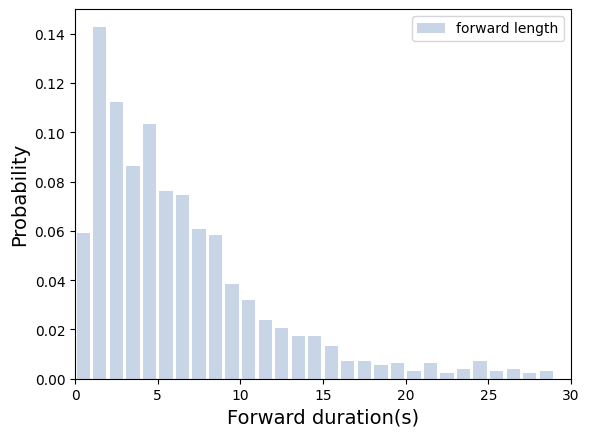

In [ ]:
forward_duration =df_6C_bottom['forward duration']
bins = np.arange(0, 30, 1)
myalpha = 0.7
rwidth = 0.8
plt.hist(forward_duration, bins=bins,
         label='forward length',
         color='lightsteelblue',
         alpha=myalpha,
         rwidth=rwidth,
         density=True)

plt.xlabel('Forward duration(s)',fontsize = 14)
plt.ylabel('Probability',fontsize = 14)
plt.legend()
plt.ylim(0,0.15)
plt.xlim(0,30)
plt.show()

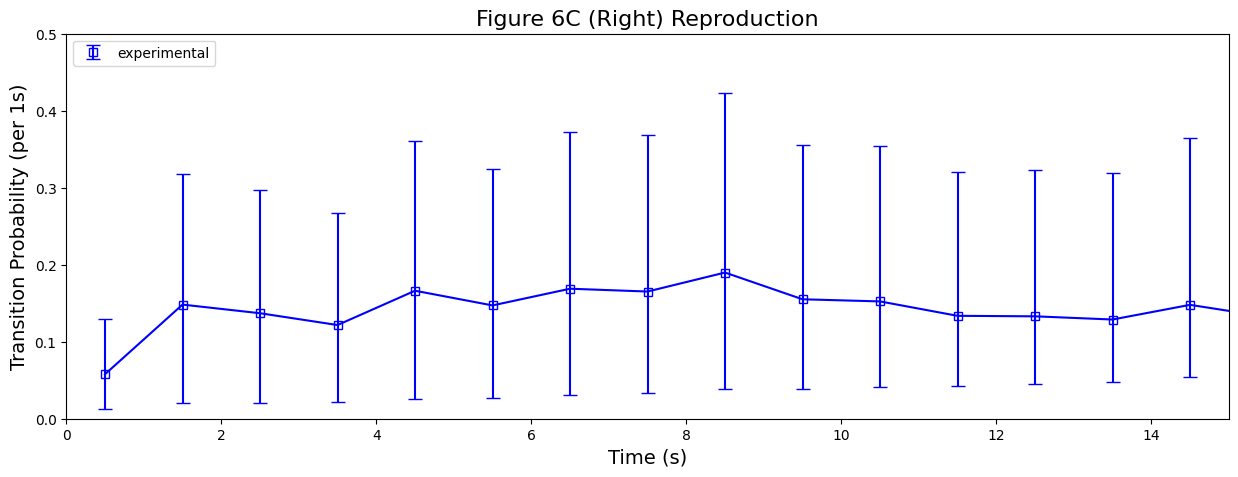

In [ ]:
forward_duration =df_6C_bottom['forward duration']
from os import pipe2
from scipy.optimize import curve_fit
from scipy.special import erfi
from statsmodels.stats.proportion import proportion_confint
import warnings
#定义bins
bin_width = 1  #Δt = 0.5
max_timeb =forward_duration.max()
binsb = np.arange(0, max_time+ bin_width, bin_width)

bin_starts_b = binsb[:-1]
bin_centers_b = bin_starts_b + (bin_width/2)

#定义分子与分母的各项
  #用histogram命令选取每个bin中完成的reversal的个数
n_forwardb_i, _ = np.histogram(forward_duration, bins=binsb)
  #获得所有reversal的实验次数作为分母
total_forwards = pd.concat([forward_duration])

  #定义S_i，在这里我们要选取在bin=0.5s内的回退的次数，通过建立一个统计分布，我们就可以在任意选出的时间t，计算下一个t+bin的时刻发生转换的概率
S_i_total_b = []
for t_start in bin_starts:
  hit = np.sum(total_forwards >= t_start) #用了一个广播比较来输出S_i(通过把all_reversals中的每一个项与每一次取出来的t_starts比较，输出bool值，让后将True = 1，False = 0，求和)
  S_i_total_b.append(hit)

S_i_total_b = np.array(S_i_total_b)

##计算转换率r1和r2，这里我们根据matlab代码中的处理方法，把被除数从公式中的Δt*Si换为Si，因为我们是从离散的数据中来拟合公式的，只能用这种经验式的处理方法
p_forward =np.divide(n_forwardb_i,S_i_total_b,
              out = np.zeros_like(n_forwardb_i,dtype = float),
              where=S_i_total_b!=0)
err_forwb_low_05, err_forwb_high_05 = proportion_confint(n_forwardb_i, S_i_total_b, method='beta')

plt.figure(figsize=(15, 5))


plt.errorbar(bin_centers_b, p_forward, yerr=[err_forwb_low_05, err_forwb_high_05],
             fmt='bs', label='experimental',
             markerfacecolor='none', capsize=5)
# 绘制拟合曲线
plt.plot(bin_centers_b, p_forward, 'b-', label='_nolegend_') # 蓝色实线

# 美化图表
plt.xlabel('Forward Duration (s)', fontsize=14)
plt.ylabel('Transition Probability (per 1s)', fontsize=14)
plt.title('Figure 6C Bottom (Right) Reproduction', fontsize=16)
plt.legend(loc='upper left')
plt.ylim(0, 0.5)
plt.xlim(0, 15)
plt.grid(False) # 关闭网格
plt.show()
###这里的误差棒非常巨大，应该是数据量的不同。

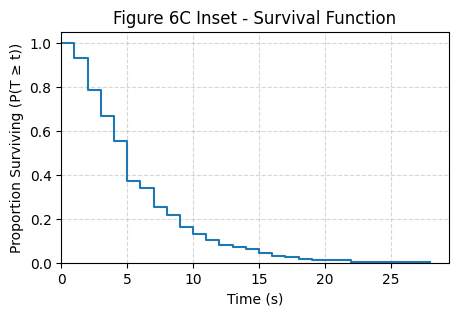

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

try:
    # 1. 计算总试验次数 N (即 t=0 时的存活数)
    #    我们可以用 len(total_reversals) 或 S_i_total[0]
    total_N = len(total_reversals)

    if total_N == 0:
        print("错误: 'total_reversals' 为空。请先运行上面的数据处理单元。")
    else:
        # 2. 计算 "存活比例" (Y 轴)
        survival_proportion = S_i_total / total_N

        # 3. 创建一个新的、尺寸适合插图的画布
        plt.figure(figsize=(5, 3)) # 5x3 英寸

        # 4. 绘制生存曲线
        #    plt.step() (阶梯图) 是绘制生存函数最标准的方法
        #    where='post' 意味着在 t 到 t+1 期间，值保持在 t 时刻的水平
        plt.step(bin_starts, survival_proportion, where='post', label='Survival Function (Data)')

        # (如果您不喜欢阶梯图，也可以用 plt.plot(bin_starts, survival_proportion)
        #  来画一条平滑的折线)

        # 5. 美化图表
        plt.title('Figure 6C Inset - Survival Function')
        plt.xlabel('Time (s)')
        plt.ylabel('Proportion Surviving (P(T ≥ t))')

        # 6. 设置坐标轴范围
        plt.ylim(0, 1.05) # Y 轴从 0 到 1
        plt.xlim(left=0)  # X 轴从 0 开始

        plt.grid(True, linestyle='--', alpha=0.5) # 添加淡淡的网格
        plt.show()

except NameError as e:
    print(f"错误: 必需的变量未定义: {e}")
    print("请确保您已经成功运行了上面的数据准备单元格。")
###画出来为曲线，明显与文中的图像不符合。观察文章坐标轴可知，文中的inset图的纵坐标以10的x次幂为纵坐标，
###结合直线形式的函数图像，推测纵坐标用的对数尺度，故从而可以方便地对函数线性拟合，求出生存曲线地半衰期

指数衰减拟合结果 (P(t) = A * e^(-k*t)):
  直线斜率 (m): -0.2152
  衰减常数 (k = -m): 0.2152
  半衰期 (Half-Life): 3.22 秒


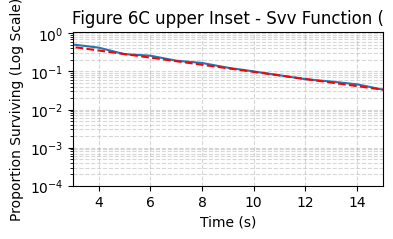

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# # 从筛选后的数据中重新定义 turn 和 no_turn
# turn_reversal_inset = df_6C_up_filtered[df_6C_up_filtered['turn'] ==1]['reversal duration_yaml']
# no_turn_inset = df_6C_up_filtered[df_6C_up_filtered['turn'] == 0]['reversal duration_yaml']

# total_reversals_filtered 现在是所有 >= 3s 的试验
total_reversals_filtered = pd.concat([turn_reversal, no_turn])


bin_width = 1
# 如果筛选后没有数据，则设置一个默认值避免报错
if not total_reversals_filtered.empty:
    max_time = np.ceil(total_reversals_filtered.max())
    # bins2 现在从0开始
    bins3 = np.arange(0, max_time + bin_width, bin_width)
    bin_starts = bins3[:-1]


# 重新计算 S_i (生存函数计数)
if not total_reversals_filtered.empty:
    S_i_total = []
    for t_start in bin_starts:
        # S_i 的定义不变：在 t 时刻，还有多少事件在持续
        hit = np.sum(total_reversals_filtered >= t_start)
        S_i_total.append(hit)
    S_i_total = np.array(S_i_total)


#计算总试验次数 N (这是筛选后的总数)
total_N = len(df_6C_up)
filter_time_up = 3
if total_N > 0:
    # 2. 计算 "存活比例" (Y 轴)
    survival_proportion = S_i_total / total_N
    ####进行拟合
    valid_indices = (survival_proportion > 0)&(bin_starts >= filter_time_up)
    x_data_fit = bin_starts[valid_indices]
    y_data_fit = survival_proportion[valid_indices]

    # 将 Y 轴数据转换为对数
    y_log_fit = np.log(y_data_fit) # 使用自然对数 (ln)

    # 2. 执行线性拟合
    # np.polyfit(x, y, 1) 返回 [斜率 m, 截距 b]
    slope, intercept = np.polyfit(x_data_fit, y_log_fit, 1)

    decay_rate_k = -slope
    half_life = np.log(2) / decay_rate_k


    print("指数衰减拟合结果 (P(t) = A * e^(-k*t)):")
    print(f"  直线斜率 (m): {slope:.4f}")
    print(f"  衰减常数 (k = -m): {decay_rate_k:.4f}")
    print(f"  半衰期 (Half-Life): {half_life:.2f} 秒")

    y_log_plot = slope * bin_starts + intercept

    # 将拟合线从对数空间转换回线性空间
    y_fit_plot = np.exp(y_log_plot)


    # 创建画布
    plt.figure(figsize=(4, 2))

    # 绘制生存曲线和拟合曲线
    plt.plot(bin_starts, survival_proportion)
    plt.plot(bin_starts, y_fit_plot, 'r--',
             label=f'Exponential Fit (k={decay_rate_k:.3f})')

    # 设置 Y 轴为对数标尺
    plt.yscale('log')

    # 美化图表
    plt.title('Figure 6C upper Inset - Svv Function (')
    plt.xlabel('Time (s)')
    plt.ylabel('Proportion Surviving (Log Scale)')

    #  设置坐标轴范围
    plt.ylim(bottom=0.0001, top=1.1)
    plt.xlim(3,15) # X 轴现在从 3 开始

    plt.grid(True, which='both', linestyle='--', alpha=0.5)
    plt.show()

指数衰减拟合结果 (Bottom Plot):
  直线斜率 (m): -0.0851
  衰减常数 (k = -m): 0.0851
  半衰期 (Half-Life): 8.14 秒


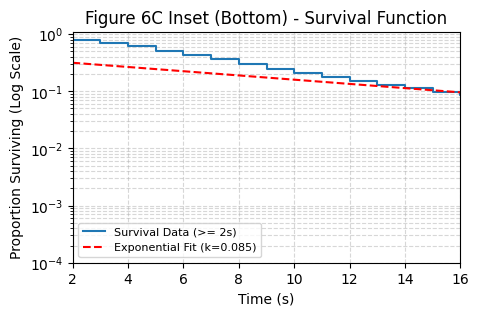

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#  绘制 Figure 6C Inset (Bottom) - Survival Function

try:
    forward_duration_bo = df_6C_bottom['forward duration']


    # 定义 'bo' 变量
    bin_width_bo = 1

    if not forward_duration_bo.empty:
        max_time_bo = np.ceil(forward_duration_bo.max())
        # 我们的分箱现在从 0s 开始
        bins_bo = np.arange(0, max_time_bo + bin_width_bo, bin_width_bo)
        bin_starts_bo = bins_bo[:-1]

    # 重新计算 S_i (生存函数计数)
    if not forward_duration_bo.empty:
        S_i_total_bo = []
        for t_start in bin_starts_bo:
            hit = np.sum(forward_duration_bo >= t_start)
            S_i_total_bo.append(hit)
        S_i_total_bo = np.array(S_i_total_bo)


    # 计算总试验次数 N (筛选后的总数)
    total_N_bo = len(forward_duration_bo)

    if total_N_bo > 0:
        # 计算 "存活比例"
        survival_proportion_bo = S_i_total_bo / total_N_bo

        # 准备拟合数据
        filter_start_time = 2
        valid_indices_bo = (survival_proportion_bo > 0) & (bin_starts_bo >= filter_start_time)
        x_data_fit_bo = bin_starts_bo[valid_indices_bo]
        y_data_fit_bo = survival_proportion_bo[valid_indices_bo]
        y_log_fit_bo = np.log(y_data_fit_bo) # 自然对数

        # 执行线性拟合
        slope_bo, intercept_bo = np.polyfit(x_data_fit_bo, y_log_fit_bo, 1)

        decay_rate_k_bo = -slope_bo
        half_life_bo = np.log(2) / decay_rate_k_bo

        print("指数衰减拟合结果 (Bottom Plot):")
        print(f"  直线斜率 (m): {slope_bo:.4f}")
        print(f"  衰减常数 (k = -m): {decay_rate_k_bo:.4f}")
        print(f"  半衰期 (Half-Life): {half_life_bo:.2f} 秒")

        # 准备绘图的拟合线
        y_log_plot_bo = slope_bo * bin_starts_bo + intercept_bo
        y_fit_plot_bo = np.exp(y_log_plot_bo)

        # 绘图
        plt.figure(figsize=(5, 3))

        plt.step(bin_starts_bo, survival_proportion_bo, where='post', label='Survival Data (>= 2s)')
        plt.plot(bin_starts_bo, y_fit_plot_bo, 'r--',
                 label=f'Exponential Fit (k={decay_rate_k_bo:.3f})')

        plt.yscale('log') # 设置 Y 轴为对数标尺

        plt.title('Figure 6C Inset (Bottom) - Survival Function')
        plt.xlabel('Time (s)')
        plt.ylabel('Proportion Surviving (Log Scale)')

        plt.ylim(bottom=0.0001, top=1.1)
        plt.xlim(2,16) # X 轴从 2s 开始

        plt.grid(True, which='both', linestyle='--', alpha=0.5)
        plt.legend(fontsize=8)
        plt.show()

except Exception as e:
    print(f"发生了一个未知错误: {e}")